# Project 7: Predictive Machine Learning Notebook Project
**Author:** Karli Dean\
**Internet Link:** This repository can be found on [GitHub](https://github.com/karlidean/datafun-07-ml).

## Part 1 - Charting a Straight Line

### Imports We Need

In [289]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Determining the Variables

In [290]:
# Defining "c" as Celsius, which will be a dependent relationship on our Farenheit table
c = lambda f: 5 / 9 * (f-32)

# Defining temps as coordinates (Farenheit, Celsius)
temps = [(f, c(f)) for f in range(0, 101, 10)]

### Determining DataFrame and Axes for Plots

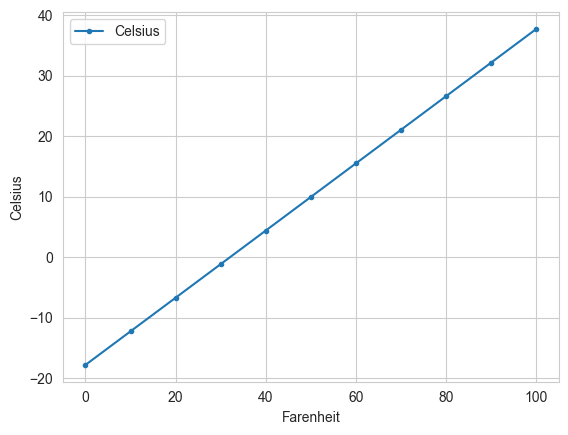

In [291]:
# Determining the temperature data frame
temps_df = pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])

# Determining the axes for the temperature plot
axes = temps_df.plot(x='Farenheit', y='Celsius', style='.-')

# Determining the y axis label (Celsius)
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Data Acquisition

In [292]:
# Telling our model where to pull from to get the data we want
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Data Inspection

In [293]:
# Looking at the head function to know what the beginning of the data frame looks like
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [294]:
# Looking at the tail function to know what the end of the data frame looks like
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Data Cleaning

In [295]:
# Renaming the columns to be more reflective of what the data is telling us
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [296]:
# Verifying the change was successful
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [297]:
nyc.Date.dtype

dtype('int64')

In [298]:
# Instead of having a 6 digit year, we are going to make the date a normal (4 digit) year format
nyc.Date = nyc.Date.floordiv(100)

In [299]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Descriptive Statistics

In [300]:
# Setting our decimal point to only two digits post the decimal.
pd.set_option('display.precision', 2)

# This code was originally pd.set_option('precision', 2) in the textbook, but is not valid in modern pandas anymore.
# I used ChatGPT to understand the function fully and find out how to get this function to do what I want.

In [301]:
# Calculating basic descriptive statistics for the dataframe
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Building the Model

In [302]:
# scipy import of stats is already at the top of the notebook

In [303]:
# Creating a linear regression of our temperatures.
# This code will not return anything, but it will run the linear regression.
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [304]:
# Acquiring the slope of the linear regression we ran in the previous code.
linear_regression.slope
# Our slope is the number in the parentheses!

np.float64(0.014771361132966163)

In [305]:
# Acquiring the y-intercept of the linear regression
linear_regression.intercept
# Should be the number in the parentheses

np.float64(8.694993233674289)

In [306]:
# Plugging our slope and intercept into the y=mx+b equation
linear_regression.slope * 2019 + linear_regression.intercept
# Finds the point on the line where x = 2019

np.float64(38.51837136113297)

In [307]:
# Plugging our slope and intercept into the y=mx+b equation
linear_regression.slope * 1890 + linear_regression.intercept
# Finds the point on the line where x = 1890

np.float64(36.612865774980335)

### Predict

In [308]:
# Plugging our slope and intercept into the y=mx+b equation
# Predicting for the year 2024
linear_regression.slope * 2024 + linear_regression.intercept
# Finds the point on the line where x = 2024

np.float64(38.5922281667978)

### Visualizations

In [309]:
# Seaborn has been imported at the top of the notebook.

In [310]:
# Settings of our graph (Style)
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Average High Temperatures in January in New York City (1895 - 2018)')

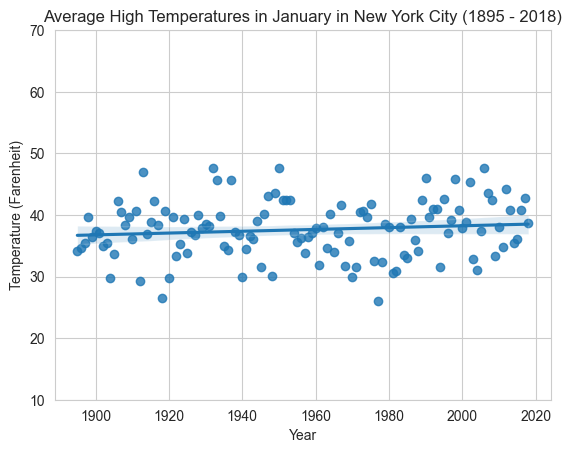

In [311]:
# Settings of our graph (Axes)
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

# Setting parameters on our y axis
axes.set_ylim(10, 70)

# Setting Axis Names and Titles
axes.set_xlabel('Year')
axes.set_ylabel('Temperature (Farenheit)')
axes.set_title('Average High Temperatures in January in New York City (1895 - 2018)')

## Prediction

### Build the Model

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

In [314]:
X_train.shape

(93, 1)

In [315]:
X_test.shape

(31, 1)

### Training the Model

In [316]:
from sklearn.linear_model import LinearRegression

In [317]:
linear_regression = LinearRegression()

In [318]:
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [319]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [320]:
linear_regression.coef_

array([0.01939167])

In [321]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Test the Model

In [322]:
predicted = linear_regression.predict(X_test)

In [323]:
expected = y_test

In [324]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Predict

In [325]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [326]:
predict(2019)

array([38.84399018])

In [327]:
predict(1890)

array([36.34246432])

In [328]:
predict(2024)

array([38.94094855])

### Visualizations

Text(0.5, 1.0, 'Average High Temperatures in NYC in January (1895 - 2018)')

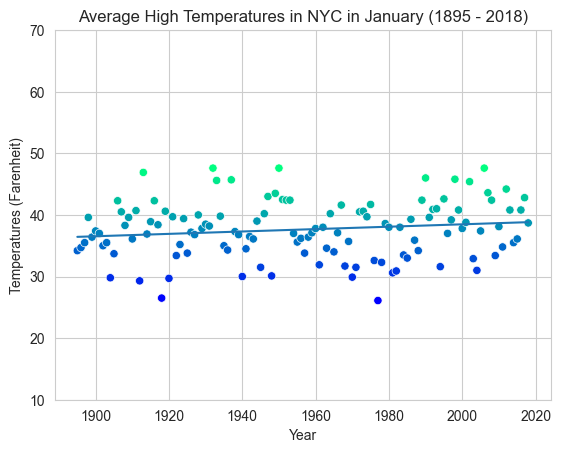

In [332]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', 
hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10,70)

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

line = plt.plot(x, y)

axes.set_xlabel('Year')
axes.set_ylabel('Temperatures (Farenheit)')
axes.set_title('Average High Temperatures in NYC in January (1895 - 2018)')